Ken Zabiy Muhammad ARIEF - M2 MOST 2022

# **Part 1 - MLxtend pour la fouille d’itemsets**

**1.1 Installation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**1.2 Importation et pr´eparation des donn´ees**

In [ ]:
dataset = [ ["Milk", "Onion", "Nutmeg", "Kidney Beans", "Eggs", "Yogurt"],
            ["Dill", "Onion", "Nutmeg", "Kidney Beans", "Eggs", "Yogurt"],
            ["Milk", "Apple", "Kidney Beans", "Eggs"],
            ["Milk", "Unicorn", "Corn", "Kidney Beans", "Yogurt"],
            ["Corn", "Onion", "Onion", "Kidney Beans", "Ice cream", "Eggs"]
          ]

dataset

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [ ]:
TB = TransactionEncoder()
TBA = TB.fit(dataset).transform(dataset)

In [ ]:
df = pd.DataFrame (TBA, columns=TB.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


**1.3 Extraction d’itemsets fr´equents et des maximaux**

In [ ]:
FI = apriori(df, min_support=0.5, use_colnames=True)
type(FI)

pandas.core.frame.DataFrame

In [ ]:
print(FI.columns)

Index(['support', 'itemsets'], dtype='object')


In [ ]:
print(FI)

    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Kidney Beans, Eggs)
6       0.6                (Onion, Eggs)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Onion, Kidney Beans, Eggs)


In [ ]:
%timeit -n 100 -r 10 apriori(df, min_support=0.5)

5.09 ms ± 1.41 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


**Question:** Apply the fpgrowth algorithm to extract frequent itemsets, then compare the computation times with computation times with Apriori. What can you conclude?

In [ ]:
!pip install mlxtend --upgrade --no-deps
!pip install --no-binary :all: mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.frequent_patterns import fpmax
MFI = fpmax(df,min_support=0.5, use_colnames=True)
print(MFI)

   support                     itemsets
0      0.6         (Milk, Kidney Beans)
1      0.6  (Onion, Kidney Beans, Eggs)
2      0.6       (Yogurt, Kidney Beans)


**1.4 Extraction de regles d’association**

In [ ]:
AR = association_rules(FI, metric="confidence", min_threshold=0.8)

**Question:** Display for each rule the antecedent and its consequent.

# **Partie 2 : Application `a des donn´ees de vente en d´etail**

**2.1 Evaluation**

**2.2 Travail a faire**

1. Load and transform the data in such away that they are recognized as transactions. In practice we build an array of binary data.

In [ ]:
db = pd.read_csv("retail_dataset.csv", sep="," ,header=0)
db = db.values.tolist()
db = [list(filter(lambda x: x == x, inner_list)) for inner_list in db]
db

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Meat', 'Pencil', 'Wine'],
 ['Eggs', 'Bread', 'Wine', 'Pencil', 'Milk', 'Diaper', 'Bagel'],
 ['Wine', 'Pencil', 'Eggs', 'Cheese'],
 ['Bagel', 'Bread', 'Milk', 'Pencil', 'Diaper'],
 ['Bread', 'Diaper', 'Cheese', 'Milk', 'Wine', 'Eggs'],
 ['Bagel', 'Wine', 'Diaper', 'Meat', 'Pencil', 'Eggs', 'Cheese'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Bagel', 'Eggs', 'Meat', 'Bread', 'Diaper', 'Wine', 'Milk'],
 ['Bread', 'Diaper', 'Pencil', 'Bagel', 'Meat'],
 ['Bagel', 'Cheese', 'Milk', 'Meat'],
 ['Bread'],
 ['Pencil', 'Diaper', 'Bagel'],
 ['Meat', 'Bagel', 'Bread'],
 ['Bread', 'Bagel', 'Milk'],
 ['Diaper'],
 ['Bagel', 'Cheese', 'Meat', 'Bread', 'Diaper', 'Eggs'],
 ['Meat', 'Pencil', 'Cheese', 'Bread'],
 ['Cheese', 'Eggs', 'Wine', 'Bread', 'Milk', 'Pencil', 'Meat'],
 ['

2. Use the Apriori algorithm to extract the frequent and maximum itemsets. You will choose a minimum support of 3%.

In [ ]:
db_TB = TransactionEncoder()
db_TBA = db_TB.fit(db).transform(db)

In [ ]:
db = pd.DataFrame (db_TBA, columns=db_TB.columns_)
db

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,False,True,True,True,True,True,False,True,True
1,False,True,True,True,False,True,True,True,True
2,False,False,True,False,True,True,True,False,True
3,False,False,True,False,True,True,True,False,True
4,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...
310,False,True,True,False,True,False,False,False,False
311,False,False,False,False,False,True,True,True,False
312,False,True,True,True,True,True,False,True,True
313,False,False,True,False,False,True,False,False,False


In [ ]:
db_FI = apriori(db, min_support=0.03, use_colnames=True)
db_FI

,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
...,...,...
296,0.073016,"(Milk, Cheese, Wine, Eggs, Meat)"
297,0.044444,"(Pencil, Cheese, Wine, Eggs, Meat)"
298,0.038095,"(Pencil, Milk, Cheese, Wine, Eggs)"
299,0.034921,"(Pencil, Milk, Cheese, Wine, Meat)"


In [ ]:
%timeit -n 100 -r 10 apriori(db, min_support=0.03)

16.9 ms ± 4.06 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [ ]:
db_MFI = fpmax(db,min_support=0.03, use_colnames=True)
print(db_MFI)

     support                           itemsets
0   0.031746        (Pencil, Milk, Meat, Bagel)
1   0.034921        (Pencil, Milk, Bagel, Eggs)
2   0.038095      (Pencil, Milk, Cheese, Bagel)
3   0.041270        (Wine, Pencil, Milk, Bagel)
4   0.044444       (Pencil, Milk, Bread, Bagel)
..       ...                                ...
68  0.038095  (Milk, Cheese, Bread, Eggs, Meat)
69  0.041270    (Milk, Wine, Bread, Eggs, Meat)
70  0.041270  (Cheese, Wine, Bread, Eggs, Meat)
71  0.050794  (Milk, Cheese, Wine, Bread, Eggs)
72  0.073016   (Milk, Cheese, Wine, Eggs, Meat)

[73 rows x 2 columns]


In [ ]:
list_support = [0.03]
rand_support = np.random.random_sample(size = 9).tolist()
list_support.extend(rand_support)
list_support.sort(reverse=True)
list_support

[0.995049684754688,
 0.8966102610704462,
 0.8519059951857154,
 0.7290686166781637,
 0.45665456531714854,
 0.4186955950248582,
 0.18364745949473582,
 0.16344344191505877,
 0.12329647585015546,
 0.03]

In [ ]:
#FI
list_FI = []
length_FI = []
count_FI = 0
for i in list_support:
  count_FI += 1
  drand_FI = apriori(db,min_support=i, use_colnames=True)
  list_FI.append(drand_FI) #List of the itemsets in each FI
  length_FI.append(len(drand_FI))
drand_FI

,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
...,...,...
296,0.073016,"(Milk, Cheese, Wine, Eggs, Meat)"
297,0.044444,"(Pencil, Cheese, Wine, Eggs, Meat)"
298,0.038095,"(Pencil, Milk, Cheese, Wine, Eggs)"
299,0.034921,"(Pencil, Milk, Cheese, Wine, Meat)"


In [ ]:
drand_FI['itemsets'].astype(str)
drand_FI

,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
...,...,...
296,0.073016,"(Milk, Cheese, Wine, Eggs, Meat)"
297,0.044444,"(Pencil, Cheese, Wine, Eggs, Meat)"
298,0.038095,"(Pencil, Milk, Cheese, Wine, Eggs)"
299,0.034921,"(Pencil, Milk, Cheese, Wine, Meat)"


In [ ]:
#MFI
list_MFI = []
length_MFI = []
count_MFI = 0
for i in list_support:
  count_MFI += 1
  drand_MFI = fpmax(db,min_support=i, use_colnames=True)
  list_MFI.append(drand_MFI) #List of the itemsets in each MFI
  length_MFI.append(len(drand_MFI))

In [ ]:
print(length_FI)
print(length_MFI)

[0, 0, 0, 0, 4, 7, 39, 48, 68, 301]
[0, 0, 0, 0, 4, 7, 24, 27, 32, 73]


In [ ]:
FI_variety = pd.DataFrame({'support_value':list_support, 'FI':length_FI})
MFI_variety = pd.DataFrame({'support_value':list_support, 'MFI':length_MFI})

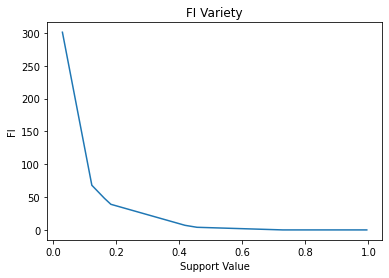

In [ ]:

plt.plot(FI_variety["support_value"], FI_variety["FI"])
plt.xlabel("Support Value")
plt.ylabel("FI")
plt.title("FI Variety")
plt.show()

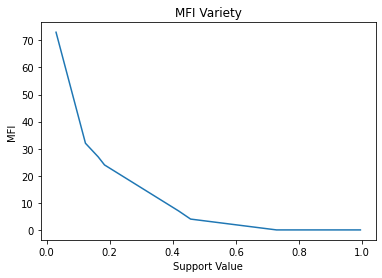

In [ ]:
plt.plot(MFI_variety["support_value"], MFI_variety["MFI"])
plt.xlabel("Support Value")
plt.ylabel("MFI")
plt.title("MFI Variety")
plt.show()

3. We want to be able to filter the itemsets according to the presence of items or a set of items. For example, which itemsets contain the product 'Eggs' ? or {'Eggs', 'Meat'} products ?

In [ ]:
for x in db_FI["itemsets"]:
  container = [list(x) for x in db_FI['itemsets']]
container

[['Bagel'],
 ['Bread'],
 ['Cheese'],
 ['Diaper'],
 ['Eggs'],
 ['Meat'],
 ['Milk'],
 ['Pencil'],
 ['Wine'],
 ['Bread', 'Bagel'],
 ['Cheese', 'Bagel'],
 ['Diaper', 'Bagel'],
 ['Bagel', 'Eggs'],
 ['Meat', 'Bagel'],
 ['Milk', 'Bagel'],
 ['Pencil', 'Bagel'],
 ['Wine', 'Bagel'],
 ['Bread', 'Cheese'],
 ['Diaper', 'Bread'],
 ['Bread', 'Eggs'],
 ['Meat', 'Bread'],
 ['Milk', 'Bread'],
 ['Pencil', 'Bread'],
 ['Wine', 'Bread'],
 ['Diaper', 'Cheese'],
 ['Cheese', 'Eggs'],
 ['Meat', 'Cheese'],
 ['Milk', 'Cheese'],
 ['Pencil', 'Cheese'],
 ['Wine', 'Cheese'],
 ['Diaper', 'Eggs'],
 ['Diaper', 'Meat'],
 ['Diaper', 'Milk'],
 ['Diaper', 'Pencil'],
 ['Wine', 'Diaper'],
 ['Meat', 'Eggs'],
 ['Milk', 'Eggs'],
 ['Pencil', 'Eggs'],
 ['Wine', 'Eggs'],
 ['Milk', 'Meat'],
 ['Pencil', 'Meat'],
 ['Wine', 'Meat'],
 ['Pencil', 'Milk'],
 ['Wine', 'Milk'],
 ['Wine', 'Pencil'],
 ['Bread', 'Bagel', 'Cheese'],
 ['Diaper', 'Bread', 'Bagel'],
 ['Bread', 'Bagel', 'Eggs'],
 ['Meat', 'Bread', 'Bagel'],
 ['Milk', 'Bread', 'Bagel

In [ ]:
def contain_or(**words):
  containing = []
  for i in range(len(container)):
    for word in words.values():
      if word in container[i]:
        containing.append(container[i])
  return containing

In [ ]:
def contain_and(**words):
  containing = []
  product = []
  for word in words.values():
    product.append(word)
  for i in range(len(container)):
    if set(product).issubset(container[i]):
      containing.append(container[i])
  return containing

In [ ]:
contain_and(p = "Bagel", q = "Bread", r = "Meat")

[['Meat', 'Bread', 'Bagel'],
 ['Meat', 'Bread', 'Bagel', 'Cheese'],
 ['Diaper', 'Meat', 'Bread', 'Bagel'],
 ['Meat', 'Bread', 'Bagel', 'Eggs'],
 ['Meat', 'Bread', 'Bagel', 'Milk'],
 ['Pencil', 'Meat', 'Bread', 'Bagel'],
 ['Wine', 'Meat', 'Bread', 'Bagel'],
 ['Diaper', 'Cheese', 'Bread', 'Bagel', 'Meat'],
 ['Cheese', 'Wine', 'Bread', 'Bagel', 'Meat'],
 ['Diaper', 'Wine', 'Bread', 'Bagel', 'Meat'],
 ['Milk', 'Wine', 'Bread', 'Bagel', 'Meat']]

4. Use the Apriori algorithm to extract the association rules from the frequent and maximal itemsets. You will choose a minimum confidence of 75%. Extract the rules with consequents 'Chesse'.

The association rules() function returns an object of type pandas.dataframe containing the different association rules, each one described by different characteristics which are the antecedent, the cons'equent, and 7 numerical indicators of rule evaluation. It will be necessary to adapt the display to have only the information related to the support, lift and confidence measures.

In [ ]:
frequent_itemsets = apriori(db, min_support=0.03, use_colnames=True)
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.425397,(Bagel),1
1,0.504762,(Bread),1
2,0.501587,(Cheese),1
3,0.406349,(Diaper),1
4,0.438095,(Eggs),1
...,...,...,...
296,0.073016,"(Milk, Cheese, Wine, Eggs, Meat)",5
297,0.044444,"(Pencil, Cheese, Wine, Eggs, Meat)",5
298,0.038095,"(Pencil, Milk, Cheese, Wine, Eggs)",5
299,0.034921,"(Pencil, Milk, Cheese, Wine, Meat)",5


In [ ]:
ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.03)
# ar["antecedents"] = ar["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
ar["consequents"] = ar["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

cheese_itemsets = ar[(ar == 'Cheese').any(axis=1)]
cheese_itemsets = cheese_itemsets[cheese_itemsets["confidence"] > 0.75]
cheese_itemsets

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
397,"(Meat, Eggs)",Cheese,0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667
403,"(Milk, Eggs)",Cheese,0.244444,0.501587,0.196825,0.805195,1.605293,0.074215,2.558519
421,"(Milk, Meat)",Cheese,0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
1964,"(Milk, Meat, Eggs)",Cheese,0.177778,0.501587,0.152381,0.857143,1.708861,0.063210,3.488889
2019,"(Wine, Milk, Eggs)",Cheese,0.136508,0.501587,0.104762,0.767442,1.530026,0.036291,2.143175
2061,"(Wine, Milk, Meat)",Cheese,0.126984,0.501587,0.101587,0.800000,1.594937,0.037894,2.492063
2511,"(Diaper, Meat, Bagel, Eggs)",Cheese,0.050794,0.501587,0.038095,0.750000,1.495253,0.012618,1.993651
2630,"(Diaper, Pencil, Bagel, Wine)",Cheese,0.041270,0.501587,0.031746,0.769231,1.533593,0.011046,2.159788
3621,"(Wine, Milk, Meat, Eggs)",Cheese,0.092063,0.501587,0.073016,0.793103,1.581187,0.026838,2.408995


5. To complete the analysis of the different association rules extracted via graphs allowing to study the correlation between the three measures (lift, confidence and support) of evaluation of the rules.

In [ ]:
cheese_final = cheese_itemsets[["support",	"confidence",	"lift"]]
cheese_final

,support,confidence,lift
397,0.215873,0.809524,1.613924
403,0.196825,0.805195,1.605293
421,0.203175,0.831169,1.657077
1964,0.152381,0.857143,1.708861
2019,0.104762,0.767442,1.530026
2061,0.101587,0.800000,1.594937
2511,0.038095,0.750000,1.495253
2630,0.031746,0.769231,1.533593
3621,0.073016,0.793103,1.581187


In [ ]:
cheese_final.corr()

,support,confidence,lift
support,1.000000,0.712602,0.712602
confidence,0.712602,1.000000,1.000000
lift,0.712602,1.000000,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


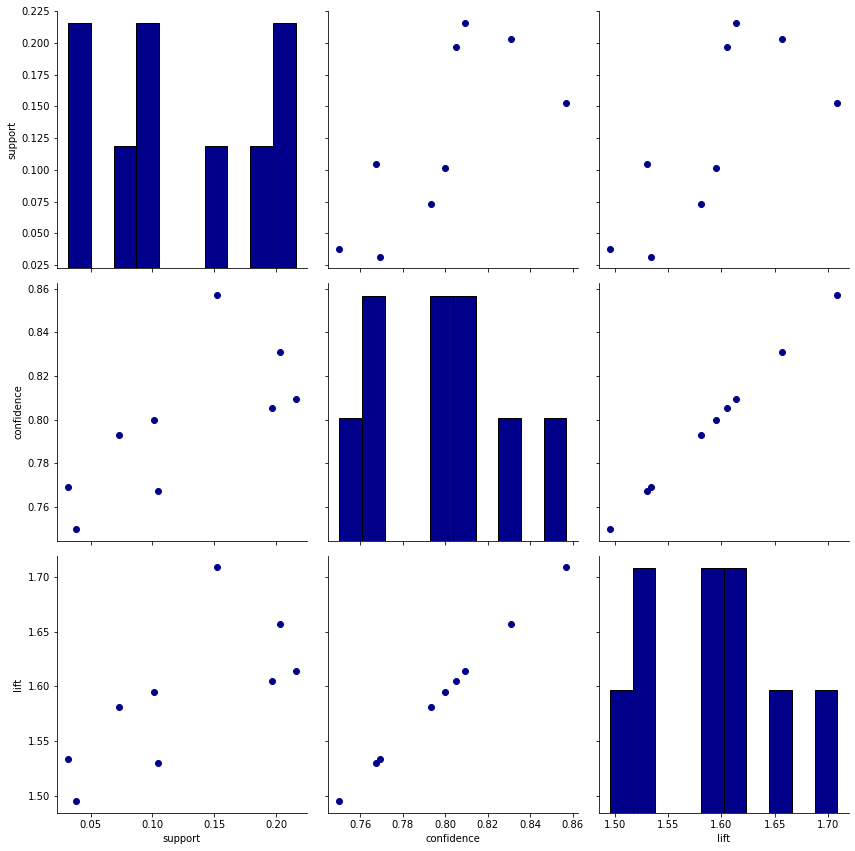

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatterFilter(x, y, **kwargs):
  interimDf = pd.concat([x, y], axis=1)
  interimDf.columns = ['x', 'y']
  interimDf = interimDf[(~ pd.isnull(interimDf.x)) & (~ pd.isnull(interimDf.y))]
  ax = plt.gca()
  ax = plt.plot(interimDf.x.values, interimDf.y.values, 'o', **kwargs)
    
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data=cheese_final, vars=list(cheese_final.columns), size = 4)

# Map a scatter plot to the upper triangle
grid = grid.map_upper(scatterFilter, color='darkblue')

# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins=10, edgecolor='k', color='darkblue')

# Map a density plot to the lower triangle
grid = grid.map_lower(scatterFilter, color='darkblue')

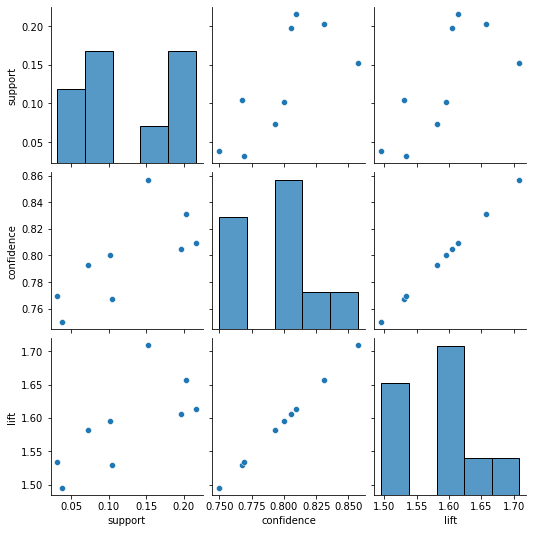

In [ ]:
sns.pairplot(cheese_final)

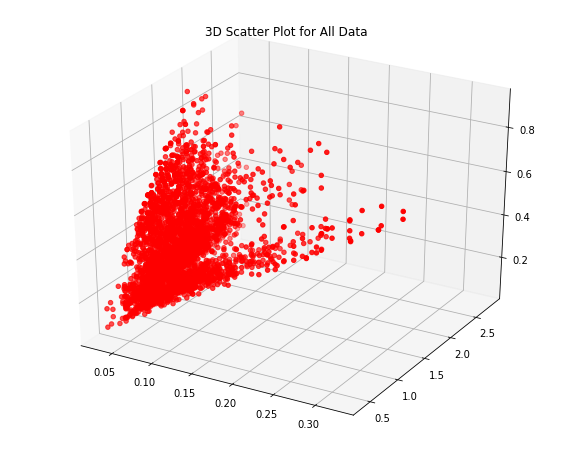

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating dataset
z = ar["confidence"]
x = ar["support"]
y = ar["lift"]
 
# Creating figure
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "red")
plt.title("3D Scatter Plot for All Data")
 
# show plot
plt.show()